In [1]:
import numpy as np
import pandas as pd
import torch
import random
import math
import matplotlib.pyplot as plt
import seaborn as sns
import torch.nn as nn

In [2]:
x = torch.tensor(100., requires_grad=True)
w1 = torch.tensor(1., requires_grad=True)
w2 = torch.tensor(1., requires_grad=True)
w3 = torch.tensor(1., requires_grad=True)
w4 = torch.tensor(1., requires_grad=True)
for func in [nn.Tanh(), nn.ReLU()]:
    y = func(w4*func(w3*func(w2*func(w1*x))))
    y.backward()
    print(f'[{w1.grad.item() :.3f}, {w2.grad.item() :.3f}, {w3.grad.item() :.3f}, {w4.grad.item() :.3f}]')
    w1.grad.zero_()
    w2.grad.zero_()
    w3.grad.zero_()
    w4.grad.zero_()


[0.000, 0.168, 0.304, 0.436]
[100.000, 100.000, 100.000, 100.000]


In [3]:
import math

def ReLU(x):
    return max(0, x)

def dReLU(x):
    if x > 0:
        return 1
    return 0

# Tanh activation
t1 =round((1 - math.tanh(math.tanh(math.tanh(math.tanh(100)))) ** 2) * (1 - math.tanh(math.tanh(math.tanh(100))) ** 2)
          * (1 - math.tanh(math.tanh(100)) ** 2) * (1 - math.tanh(100) ** 2) * 100, 3)
t2 = round((1 - math.tanh(math.tanh(math.tanh(math.tanh(100)))) ** 2) * (1 - math.tanh(math.tanh(math.tanh(100))) ** 2)
           * (1 - math.tanh(math.tanh(100)) ** 2) * math.tanh(100), 3)
t3 = round((1 - math.tanh(math.tanh(math.tanh(math.tanh(100)))) ** 2) * (1 - math.tanh(math.tanh(math.tanh(100))) ** 2)
      * math.tanh(math.tanh(100)), 3)
t4 = round((1 - math.tanh(math.tanh(math.tanh(math.tanh(100)))) ** 2) * math.tanh(math.tanh(math.tanh(100))), 3)
# ReLU activation
r1 = round(dReLU(ReLU(ReLU(ReLU(100)))) * dReLU(ReLU(ReLU(100))) * dReLU(ReLU(100)) * dReLU(100) * 100, 3)
r2 = round(dReLU(ReLU(ReLU(ReLU(100)))) * dReLU(ReLU(ReLU(100))) * dReLU(ReLU(100)) * ReLU(100), 3)
r3 = round(dReLU(ReLU(ReLU(ReLU(100)))) * dReLU(ReLU(ReLU(100))) * ReLU(ReLU(100)), 3)
r4 = round(dReLU(ReLU(ReLU(ReLU(100)))) * ReLU(ReLU(ReLU(100))), 3)
answer1, answer2 = [t1, t2, t3, t4], [r1, r2, r3, r4]

print(answer1, answer2, sep=',')

[0.0, 0.168, 0.304, 0.436],[100, 100, 100, 100]


In [4]:
class LeNet(torch.nn.Module):
    def __init__(self,
                 activation='tanh',
                 pooling='avg',
                 conv_size=5,
                 use_batch_norm=False):
        super().__init__()

        self.conv_size = conv_size
        self.use_batch_norm = use_batch_norm


        activation_function = eval(f'torch.nn.{activation}()')

        if pooling == 'avg':
            pooling_layer = torch.nn.AvgPool2d(kernel_size=2, stride=2)
        elif pooling == 'max':
            pooling_layer  = torch.nn.MaxPool2d(kernel_size=2, stride=2)
        else:
            raise NotImplementedError

        if conv_size == 5:
            self.conv1 = torch.nn.Conv2d(
                in_channels=1, out_channels=6, kernel_size=5, padding=2)
        elif conv_size == 3:
            self.conv1_1 = torch.nn.Conv2d(
                in_channels=1, out_channels=6, kernel_size=3, padding=1)
            self.conv1_2 = torch.nn.Conv2d(
                in_channels=6, out_channels=6, kernel_size=3, padding=1)
        else:
            raise NotImplementedError

        self.act1 = activation_function
        self.bn1 = torch.nn.BatchNorm2d(num_features=6)
        self.pool1 = pooling_layer

        if conv_size == 5:
            self.conv2 = self.conv2 = torch.nn.Conv2d(
                in_channels=6, out_channels=16, kernel_size=5, padding=0)
        elif conv_size == 3:
            self.conv2_1 = torch.nn.Conv2d(
                in_channels=6, out_channels=16, kernel_size=3, padding=0)
            self.conv2_2 = torch.nn.Conv2d(
                in_channels=16, out_channels=16, kernel_size=3, padding=0)
        else:
            raise NotImplementedError

        self.act2 = activation_function
        self.bn2 = torch.nn.BatchNorm2d(num_features=16)
        self.pool2 = pooling_layer

        self.fc1 = torch.nn.Linear(5 * 5 * 16, 120)
        self.act3 = activation_function

        self.fc2 = torch.nn.Linear(120, 84)
        self.act4 = activation_function

        self.fc3 = torch.nn.Linear(84, 10)

    def forward(self, x):
        if self.conv_size == 5:
            x = self.conv1(x)
        elif self.conv_size == 3:
            x = self.conv1_2(self.conv1_1(x))
        x = self.act1(x)
        if self.use_batch_norm:
            x = self.bn1(x)
        x = self.pool1(x)

        if self.conv_size == 5:
            x = self.conv2(x)
        elif self.conv_size == 3:
            x = self.conv2_2(self.conv2_1(x))
        x = self.act2(x)
        if self.use_batch_norm:
            x = self.bn2(x)
        x = self.pool2(x)

        x = x.view(x.size(0), x.size(1) * x.size(2) * x.size(3))
        x = self.fc1(x)
        x = self.act3(x)
        x = self.fc2(x)
        x = self.act4(x)
        x = self.fc3(x)

        return x

In [5]:
import torchvision
MNIST_train = torchvision.datasets.MNIST('./', download=True, train=True)
MNIST_test = torchvision.datasets.MNIST('./', download=True, train=False)
x_train = MNIST_train.train_data.float()
y_train = MNIST_train.train_labels
x_test = MNIST_test.test_data.float()
y_test = MNIST_test.test_labels

100%|██████████| 9912422/9912422 [00:00<00:00, 200550443.03it/s]

Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 43108787.84it/s]


Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 122109069.98it/s]

Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw




100%|██████████| 4542/4542 [00:00<00:00, 4231570.14it/s]


Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



/usr/local/lib/python3.10/dist-packages/torchvision/datasets/mnist.py:75: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/usr/local/lib/python3.10/dist-packages/torchvision/datasets/mnist.py:65: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")
/usr/local/lib/python3.10/dist-packages/torchvision/datasets/mnist.py:80: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.10/dist-packages/torchvision/datasets/mnist.py:70: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


5


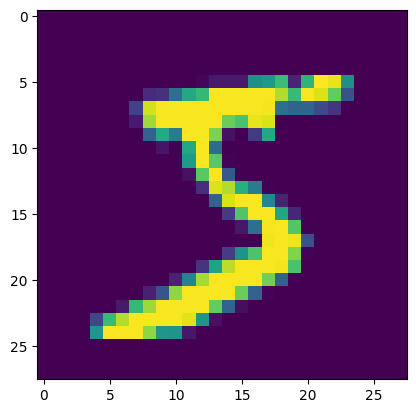

In [6]:
plt.imshow(x_train[0,:,:])
print(y_train[0].item())

In [7]:
x_train = x_train.unsqueeze(1)
x_test = x_test.unsqueeze(1)

In [8]:
def train(net, x_train, y_train, x_test, y_test, n_epochs=30, do_print=True):
    device = ('cuda:0' if torch.cuda.is_available() else 'cpu')
    net = net.to(device)

    batch_size = 1000

    loss_val_history = []
    accuracy_history = []

    loss_function = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(net.parameters(), lr = 1e-3)

    for epoch in range(n_epochs):
        net.train()

        order = np.random.permutation(x_train.shape[0])

        for start_index in range(0, x_train.shape[0], batch_size):
            inds = order[start_index : start_index + batch_size]
            x_train_batch = x_train[inds].to(device)
            y_train_batch = y_train[inds].to(device)

            optimizer.zero_grad()

            y_pred_batch = net.forward(x_train_batch)
            loss_val = loss_function(y_pred_batch, y_train_batch)
            loss_val.backward()

            optimizer.step()

        net.eval()

        order = np.random.permutation(x_test.shape[0])

        temp_loss_storage = []
        temp_accuracy_storage = []

        for start_index in range(0, x_test.shape[0], batch_size):
            inds = order[start_index : start_index + batch_size]
            x_test_batch = x_test[inds].to(device)
            y_test_batch = y_test[inds].to(device)

            y_pred_batch = net.forward(x_test_batch)

            loss_val = loss_function(y_pred_batch, y_test_batch).data.cpu()
            accuracy = (y_pred_batch.argmax(dim=1) == y_test_batch).float().mean().data.cpu()

            temp_loss_storage.append(loss_val)
            temp_accuracy_storage.append(accuracy)

        overall_loss = sum(temp_loss_storage)
        overall_accuracy = sum(temp_accuracy_storage)/len(temp_accuracy_storage)

        if do_print:
            print(f'epoch: {epoch}; loss: {overall_loss}; accuracy: {overall_accuracy}')

        loss_val_history.append(overall_loss)
        accuracy_history.append(overall_accuracy)

    return net, loss_val_history, accuracy_history

In [ ]:
net = LeNet(activation='ReLU', conv_size=3, pooling='max', use_batch_norm=True)
learned_net, loss_history, accuracy_history = train(net, x_train, y_train, x_test, y_test, n_epochs = 50, do_print = True)

epoch: 0; loss: 0.8649598956108093; accuracy: 0.9732000231742859
epoch: 1; loss: 0.5480032563209534; accuracy: 0.9814000129699707
epoch: 2; loss: 0.4838007688522339; accuracy: 0.9840000867843628
epoch: 3; loss: 0.479423463344574; accuracy: 0.9839000701904297
epoch: 4; loss: 0.40157216787338257; accuracy: 0.9866001009941101
epoch: 5; loss: 0.3390456736087799; accuracy: 0.9891999959945679
epoch: 6; loss: 0.34812092781066895; accuracy: 0.9894000291824341
epoch: 7; loss: 0.38240697979927063; accuracy: 0.9882000684738159
epoch: 8; loss: 0.39330995082855225; accuracy: 0.9883999824523926
epoch: 9; loss: 0.4231497645378113; accuracy: 0.9870999455451965
epoch: 10; loss: 0.37231725454330444; accuracy: 0.9882000088691711
epoch: 11; loss: 0.3549593687057495; accuracy: 0.9894000887870789
epoch: 12; loss: 0.34533506631851196; accuracy: 0.990100085735321
epoch: 13; loss: 0.356890469789505; accuracy: 0.990100085735321
epoch: 14; loss: 0.3806889057159424; accuracy: 0.9895000457763672
epoch: 15; loss: 0